Name: Niket Bahety

Assignment 5

Enrollment Number: 2020CSB074

In [23]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Input
from sklearn.model_selection import train_test_split
import cv2
import matplotlib.pyplot as plt
import time

# Define the RBF function
def RBF(x, c, s):
    return np.exp(((x - c) ** 2) / (2 * s ** 2))

# Define the transformation function
def transform(image):
    image = np.pad(image, (2, 2))
    c = np.mean(image)
    s = np.std(image)
    return RBF(image, c, s).flatten()

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Transform the images
x_train_transformed = np.array([transform(image) for image in x_train])
x_test_transformed = np.array([transform(image) for image in x_test])

# Normalize the data to values between 0 and 1
x_train_transformed = x_train_transformed / 255.0
x_test_transformed = x_test_transformed / 255.0

# Split the dataset into training, validation, and test sets
x_train, x_val, y_train, y_val = train_test_split(x_train_transformed, y_train, test_size=0.2, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_val, y_val, test_size=0.5, random_state=42)

In [24]:
best_hyperparameters = {}
best_accuracy = 0
model= Sequential()

In [25]:
def train_model(hyperparameters):
  for hyperparams in hyperparameters:
    # Build and compile the fully connected neural network
    global model
    model = Sequential()

    model.add(Input(shape=(1024,)))

    for neurons in hyperparams['hidden_layers']:
        model.add(Dense(neurons, activation='sigmoid'))

    model.add(Dropout(hyperparams['rate']))

    # Add output layer
    model.add(Dense(10, activation='softmax'))

    # Compile the model with the specified learning rate
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=hyperparams['learning_rate']),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    start_time = time.time()

    # Train the model
    history = model.fit(x_train, keras.utils.to_categorical(y_train, 10),
              validation_data=(x_val, keras.utils.to_categorical(y_val, 10)),
              epochs=50,
              batch_size=64)

    end_time = time.time()

    training_time = end_time - start_time

    # Evaluate the model on the test set
    test_loss, test_accuracy = model.evaluate(x_test, keras.utils.to_categorical(y_test, 10))
    print(f'Test accuracy with hyperparameters {hyperparams}: {test_accuracy}\n')

    global best_hyperparameters
    global best_accuracy

    if test_accuracy > best_accuracy:
      best_accuracy = test_accuracy
      best_hyperparameters = hyperparams

    plot_training_history(history, hyperparams)

    return [test_accuracy, training_time]

In [26]:
def plot_training_history(history, hyperparams):
    # Extract training and validation loss and accuracy
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    train_accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    # Create an array of epoch numbers
    epochs = range(1, len(train_loss) + 1)

    # Plot loss vs epoch
    plt.figure()
    plt.plot(epochs, train_loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title(f'Loss vs Epoch ({hyperparams})')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # Plot accuracy vs epoch
    plt.figure()
    plt.plot(epochs, train_accuracy, 'bo', label='Training accuracy')
    plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
    plt.title(f'Loss vs Epoch ({hyperparams})')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

Epoch 1/50
750/750 [==============================] - 2s 2ms/step - loss: 1.5199 - accuracy: 0.6223 - val_loss: 1.1605 - val_accuracy: 0.7285
Epoch 2/50
750/750 [==============================] - 1s 2ms/step - loss: 0.9817 - accuracy: 0.7841 - val_loss: 0.8539 - val_accuracy: 0.8127
Epoch 3/50
750/750 [==============================] - 1s 2ms/step - loss: 0.7550 - accuracy: 0.8277 - val_loss: 0.6986 - val_accuracy: 0.8400
Epoch 4/50
750/750 [==============================] - 1s 2ms/step - loss: 0.6325 - accuracy: 0.8504 - val_loss: 0.6107 - val_accuracy: 0.8538
Epoch 5/50
750/750 [==============================] - 1s 2ms/step - loss: 0.5597 - accuracy: 0.8642 - val_loss: 0.5601 - val_accuracy: 0.8655
Epoch 6/50
750/750 [==============================] - 1s 2ms/step - loss: 0.5118 - accuracy: 0.8731 - val_loss: 0.5233 - val_accuracy: 0.8725
Epoch 7/50
750/750 [==============================] - 1s 2ms/step - loss: 0.4782 - accuracy: 0.8788 - val_loss: 0.5008 - val_accuracy: 0.8747
Epoch 

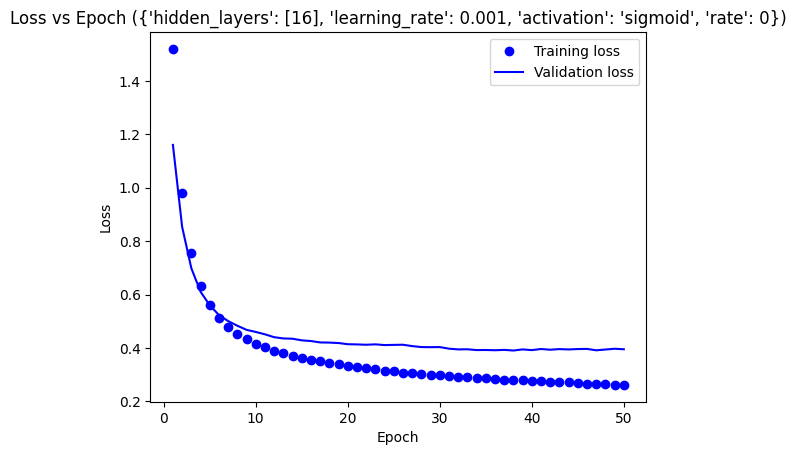

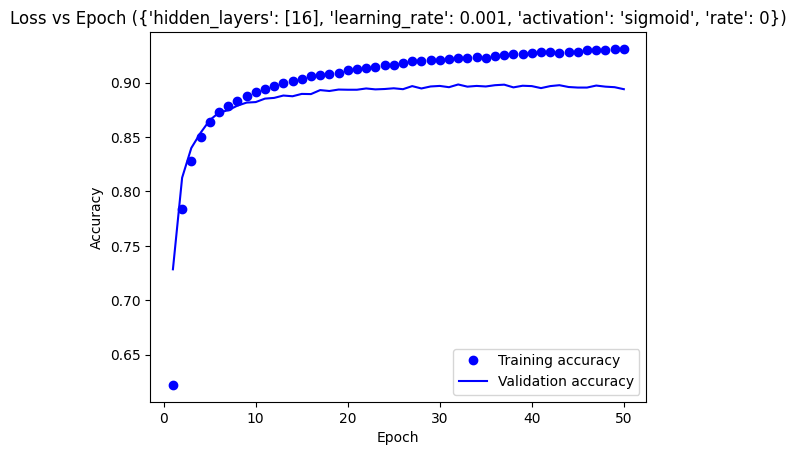

[0.8939999938011169, 82.57977414131165]

In [27]:
# Define different sets of hyperparameters
hyperparameters = [
    {'hidden_layers': [16], 'learning_rate': 0.001, 'activation': 'sigmoid', 'rate': 0},
    {'hidden_layers': [16, 32], 'learning_rate': 0.001, 'activation': 'sigmoid', 'rate': 0},
    {'hidden_layers': [16, 32, 64], 'learning_rate': 0.001, 'activation': 'sigmoid', 'rate': 0}
]
train_model(hyperparameters)

Epoch 1/50
750/750 [==============================] - 2s 2ms/step - loss: 1.7158 - accuracy: 0.4456 - val_loss: 1.1705 - val_accuracy: 0.6392
Epoch 2/50
750/750 [==============================] - 1s 2ms/step - loss: 0.9842 - accuracy: 0.7013 - val_loss: 0.8271 - val_accuracy: 0.7633
Epoch 3/50
750/750 [==============================] - 1s 2ms/step - loss: 0.7251 - accuracy: 0.7949 - val_loss: 0.6605 - val_accuracy: 0.8122
Epoch 4/50
750/750 [==============================] - 1s 2ms/step - loss: 0.6021 - accuracy: 0.8322 - val_loss: 0.5864 - val_accuracy: 0.8313
Epoch 5/50
750/750 [==============================] - 1s 2ms/step - loss: 0.5385 - accuracy: 0.8513 - val_loss: 0.5355 - val_accuracy: 0.8500
Epoch 6/50
750/750 [==============================] - 1s 2ms/step - loss: 0.4941 - accuracy: 0.8625 - val_loss: 0.5071 - val_accuracy: 0.8598
Epoch 7/50
750/750 [==============================] - 2s 2ms/step - loss: 0.4620 - accuracy: 0.8709 - val_loss: 0.4852 - val_accuracy: 0.8637
Epoch 

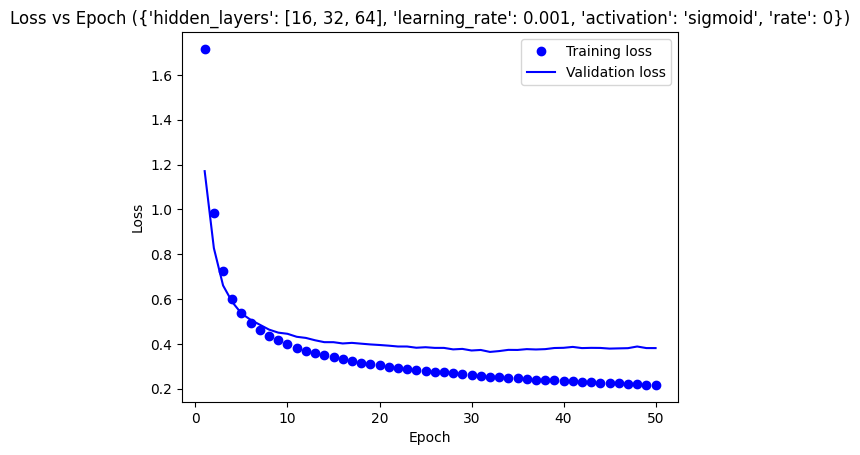

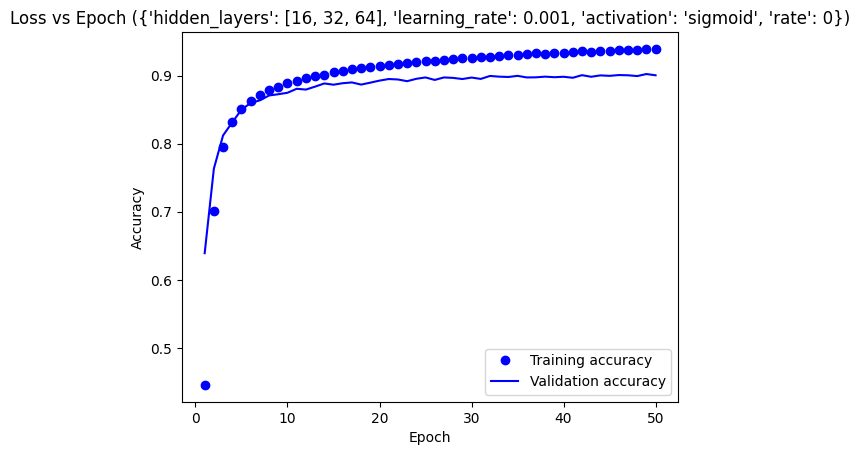

[0.9016666412353516, 82.64873576164246]

In [28]:
# Define different sets of hyperparameters
hyperparameters = [
    {'hidden_layers': [16, 32, 64], 'learning_rate': 0.001, 'activation': 'sigmoid', 'rate': 0},
    {'hidden_layers': [16, 32, 64], 'learning_rate': 0.001, 'activation': 'tanh', 'rate': 0},
    {'hidden_layers': [16, 32, 64], 'learning_rate': 0.001, 'activation': 'relu', 'rate': 0}
]
train_model(hyperparameters)

Epoch 1/50
750/750 [==============================] - 2s 2ms/step - loss: 2.4283 - accuracy: 0.1020 - val_loss: 2.2995 - val_accuracy: 0.1137
Epoch 2/50
750/750 [==============================] - 1s 2ms/step - loss: 2.2934 - accuracy: 0.1080 - val_loss: 2.2193 - val_accuracy: 0.1137
Epoch 3/50
750/750 [==============================] - 1s 2ms/step - loss: 2.1175 - accuracy: 0.1906 - val_loss: 2.0274 - val_accuracy: 0.2227
Epoch 4/50
750/750 [==============================] - 1s 2ms/step - loss: 2.0234 - accuracy: 0.2354 - val_loss: 1.9142 - val_accuracy: 0.2928
Epoch 5/50
750/750 [==============================] - 1s 2ms/step - loss: 1.8751 - accuracy: 0.2765 - val_loss: 1.7039 - val_accuracy: 0.3397
Epoch 6/50
750/750 [==============================] - 2s 2ms/step - loss: 1.7509 - accuracy: 0.3103 - val_loss: 1.5986 - val_accuracy: 0.3798
Epoch 7/50
750/750 [==============================] - 2s 2ms/step - loss: 1.6736 - accuracy: 0.3337 - val_loss: 1.5050 - val_accuracy: 0.4315
Epoch 

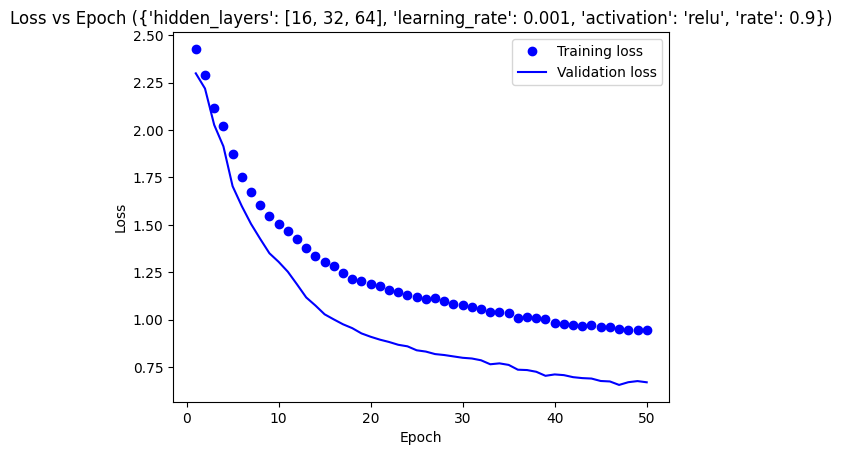

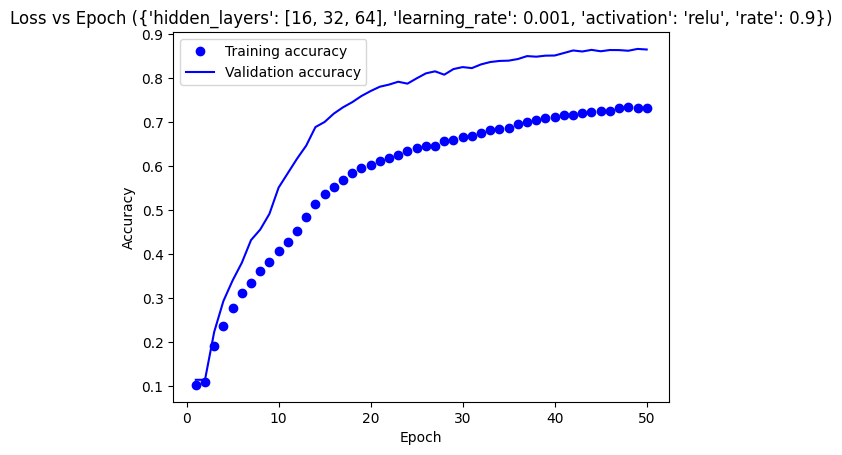

[0.859333336353302, 82.6546847820282]

In [29]:
# Define different sets of hyperparameters
hyperparameters = [
    {'hidden_layers': [16, 32, 64], 'learning_rate': 0.001, 'activation': 'relu', 'rate': 0.9},
    {'hidden_layers': [16, 32, 64], 'learning_rate': 0.001, 'activation': 'relu', 'rate': 0.75},
    {'hidden_layers': [16, 32, 64], 'learning_rate': 0.001, 'activation': 'relu', 'rate': 0.5},
    {'hidden_layers': [16, 32, 64], 'learning_rate': 0.001, 'activation': 'relu', 'rate': 0.25},
    {'hidden_layers': [16, 32, 64], 'learning_rate': 0.001, 'activation': 'relu', 'rate': 0.1}
]
train_model(hyperparameters)

In [30]:
print(best_hyperparameters)
print(best_accuracy)

{'hidden_layers': [16, 32, 64], 'learning_rate': 0.001, 'activation': 'sigmoid', 'rate': 0}
0.9016666412353516


In [31]:
import time
learning_rates_to_test = [0.01, 0.001, 0.005, 0.0001, 0.0005]

Epoch 1/50
750/750 [==============================] - 2s 2ms/step - loss: 0.8277 - accuracy: 0.7350 - val_loss: 0.5324 - val_accuracy: 0.8510
Epoch 2/50
750/750 [==============================] - 1s 2ms/step - loss: 0.4591 - accuracy: 0.8637 - val_loss: 0.4396 - val_accuracy: 0.8713
Epoch 3/50
750/750 [==============================] - 1s 2ms/step - loss: 0.4057 - accuracy: 0.8806 - val_loss: 0.4065 - val_accuracy: 0.8827
Epoch 4/50
750/750 [==============================] - 1s 2ms/step - loss: 0.3684 - accuracy: 0.8915 - val_loss: 0.3707 - val_accuracy: 0.8953
Epoch 5/50
750/750 [==============================] - 2s 2ms/step - loss: 0.3435 - accuracy: 0.8979 - val_loss: 0.3701 - val_accuracy: 0.8928
Epoch 6/50
750/750 [==============================] - 2s 2ms/step - loss: 0.3284 - accuracy: 0.9021 - val_loss: 0.3499 - val_accuracy: 0.8942
Epoch 7/50
750/750 [==============================] - 1s 2ms/step - loss: 0.3190 - accuracy: 0.9046 - val_loss: 0.3753 - val_accuracy: 0.8928
Epoch 

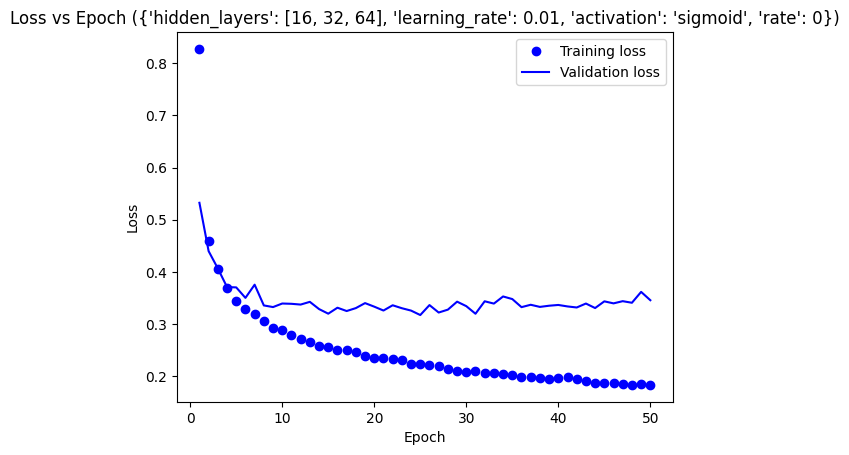

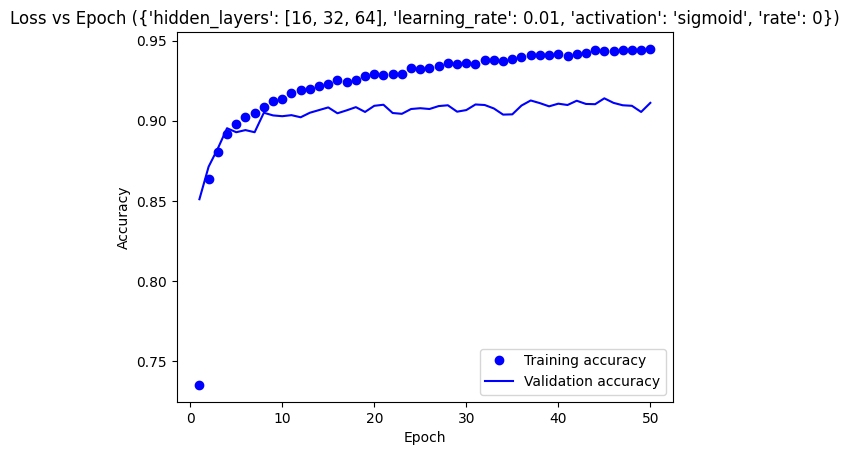

Epoch 1/50
750/750 [==============================] - 2s 2ms/step - loss: 1.7614 - accuracy: 0.3961 - val_loss: 1.2518 - val_accuracy: 0.6122
Epoch 2/50
750/750 [==============================] - 2s 2ms/step - loss: 0.9665 - accuracy: 0.7235 - val_loss: 0.7535 - val_accuracy: 0.7823
Epoch 3/50
750/750 [==============================] - 2s 2ms/step - loss: 0.6548 - accuracy: 0.8202 - val_loss: 0.5987 - val_accuracy: 0.8308
Epoch 4/50
750/750 [==============================] - 1s 2ms/step - loss: 0.5446 - accuracy: 0.8507 - val_loss: 0.5321 - val_accuracy: 0.8523
Epoch 5/50
750/750 [==============================] - 1s 2ms/step - loss: 0.4866 - accuracy: 0.8674 - val_loss: 0.4952 - val_accuracy: 0.8640
Epoch 6/50
750/750 [==============================] - 1s 2ms/step - loss: 0.4484 - accuracy: 0.8774 - val_loss: 0.4631 - val_accuracy: 0.8718
Epoch 7/50
750/750 [==============================] - 1s 2ms/step - loss: 0.4204 - accuracy: 0.8849 - val_loss: 0.4479 - val_accuracy: 0.8780
Epoch 

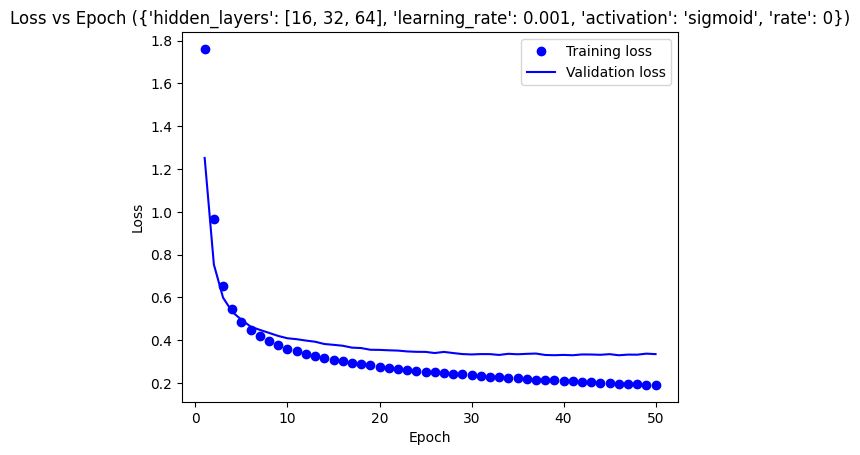

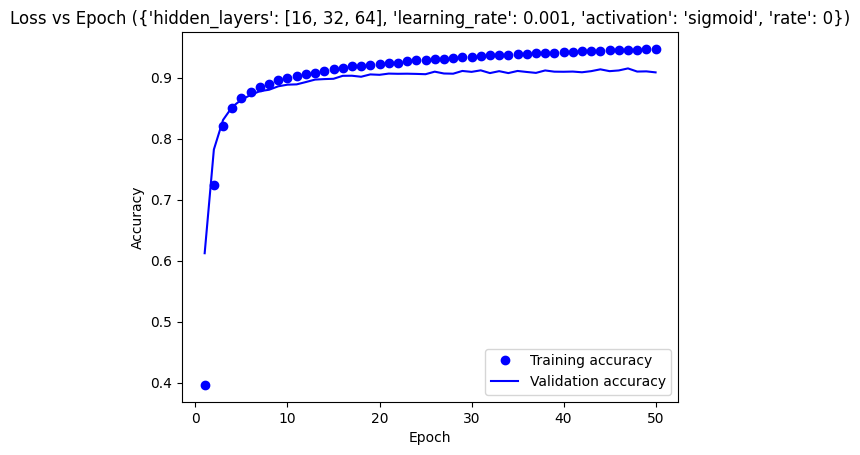

Epoch 1/50
750/750 [==============================] - 2s 2ms/step - loss: 0.9859 - accuracy: 0.6896 - val_loss: 0.5727 - val_accuracy: 0.8332
Epoch 2/50
750/750 [==============================] - 1s 2ms/step - loss: 0.5024 - accuracy: 0.8547 - val_loss: 0.4551 - val_accuracy: 0.8698
Epoch 3/50
750/750 [==============================] - 1s 2ms/step - loss: 0.4175 - accuracy: 0.8780 - val_loss: 0.4249 - val_accuracy: 0.8790
Epoch 4/50
750/750 [==============================] - 1s 2ms/step - loss: 0.3742 - accuracy: 0.8889 - val_loss: 0.3981 - val_accuracy: 0.8873
Epoch 5/50
750/750 [==============================] - 1s 2ms/step - loss: 0.3488 - accuracy: 0.8969 - val_loss: 0.3804 - val_accuracy: 0.8893
Epoch 6/50
750/750 [==============================] - 1s 2ms/step - loss: 0.3305 - accuracy: 0.9020 - val_loss: 0.3684 - val_accuracy: 0.8940
Epoch 7/50
750/750 [==============================] - 1s 2ms/step - loss: 0.3178 - accuracy: 0.9057 - val_loss: 0.3543 - val_accuracy: 0.8940
Epoch 

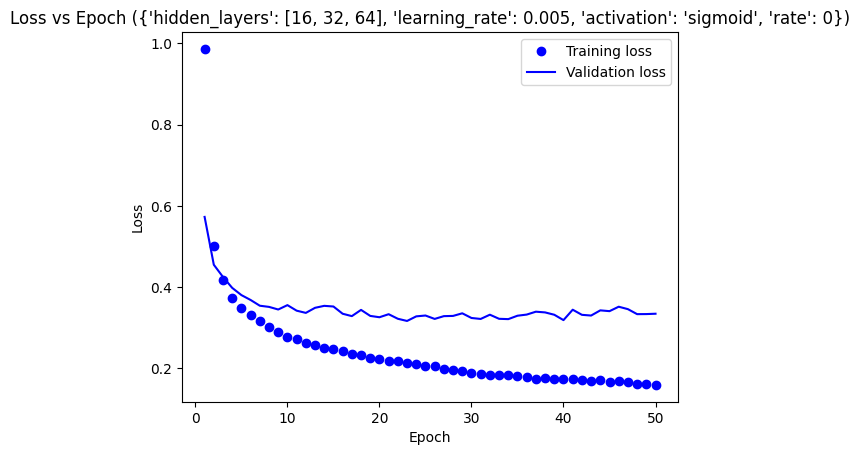

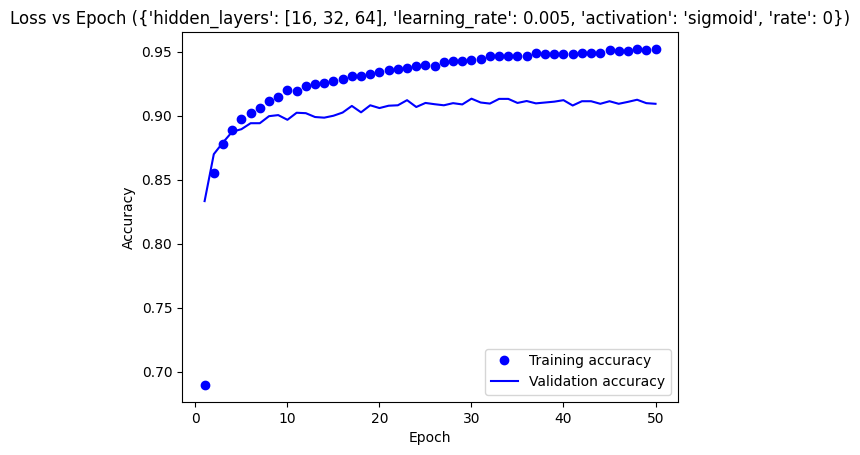

Epoch 1/50
750/750 [==============================] - 3s 2ms/step - loss: 2.2983 - accuracy: 0.1329 - val_loss: 2.2614 - val_accuracy: 0.1685
Epoch 2/50
750/750 [==============================] - 1s 2ms/step - loss: 2.2163 - accuracy: 0.2547 - val_loss: 2.1525 - val_accuracy: 0.3277
Epoch 3/50
750/750 [==============================] - 2s 2ms/step - loss: 2.0623 - accuracy: 0.3442 - val_loss: 1.9690 - val_accuracy: 0.3570
Epoch 4/50
750/750 [==============================] - 1s 2ms/step - loss: 1.8856 - accuracy: 0.3606 - val_loss: 1.8020 - val_accuracy: 0.3938
Epoch 5/50
750/750 [==============================] - 2s 2ms/step - loss: 1.7340 - accuracy: 0.3956 - val_loss: 1.6696 - val_accuracy: 0.4542
Epoch 6/50
750/750 [==============================] - 2s 2ms/step - loss: 1.6238 - accuracy: 0.4550 - val_loss: 1.5778 - val_accuracy: 0.5110
Epoch 7/50
750/750 [==============================] - 2s 2ms/step - loss: 1.5408 - accuracy: 0.5222 - val_loss: 1.5012 - val_accuracy: 0.5598
Epoch 

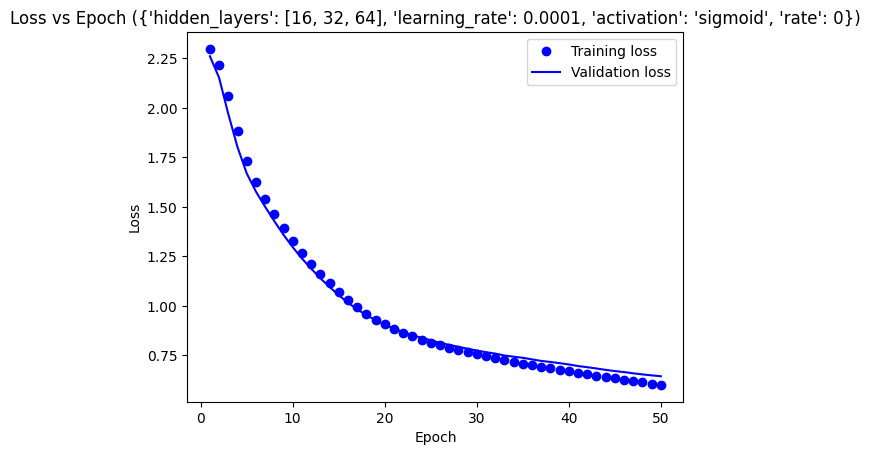

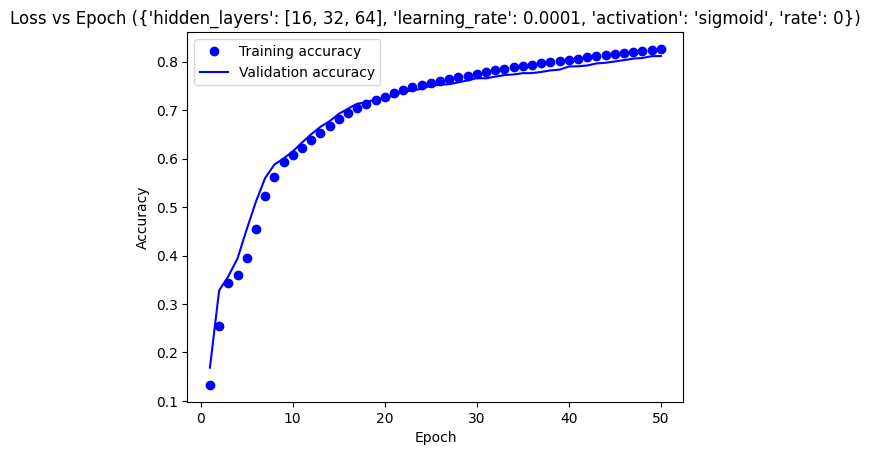

Epoch 1/50
750/750 [==============================] - 2s 2ms/step - loss: 2.0573 - accuracy: 0.2863 - val_loss: 1.6773 - val_accuracy: 0.5158
Epoch 2/50
750/750 [==============================] - 2s 2ms/step - loss: 1.3758 - accuracy: 0.5995 - val_loss: 1.1339 - val_accuracy: 0.6712
Epoch 3/50
750/750 [==============================] - 1s 2ms/step - loss: 1.0183 - accuracy: 0.6996 - val_loss: 0.9363 - val_accuracy: 0.7170
Epoch 4/50
750/750 [==============================] - 2s 2ms/step - loss: 0.8817 - accuracy: 0.7345 - val_loss: 0.8485 - val_accuracy: 0.7450
Epoch 5/50
750/750 [==============================] - 2s 2ms/step - loss: 0.8115 - accuracy: 0.7544 - val_loss: 0.7979 - val_accuracy: 0.7597
Epoch 6/50
750/750 [==============================] - 1s 2ms/step - loss: 0.7638 - accuracy: 0.7690 - val_loss: 0.7669 - val_accuracy: 0.7668
Epoch 7/50
750/750 [==============================] - 1s 2ms/step - loss: 0.7273 - accuracy: 0.7806 - val_loss: 0.7351 - val_accuracy: 0.7808
Epoch 

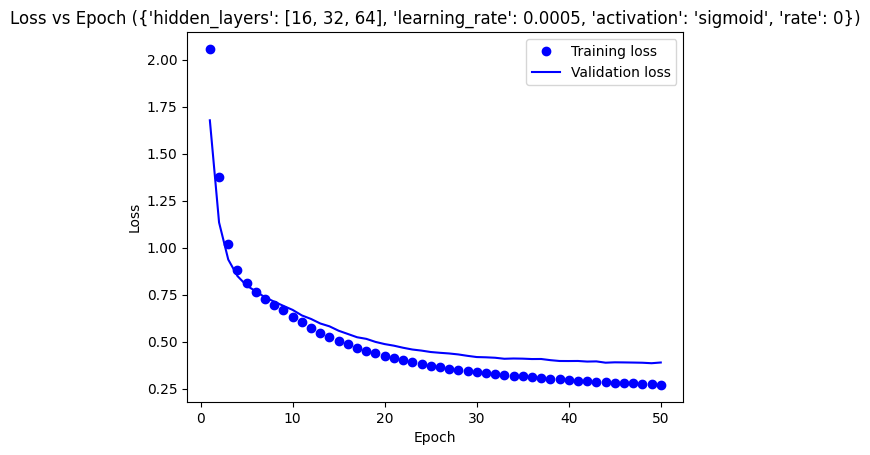

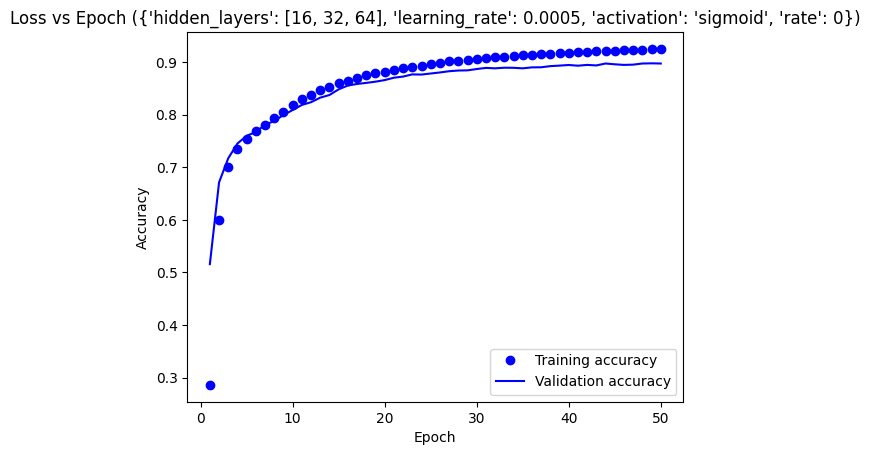

Best learning rate: 0.005
Best validation accuracy: 0.9123333096504211
Time to achieve best validation accuracy: 82.78418731689453 seconds


In [32]:
best_accuracy_rate = 0
best_learning_rate = 0
best_training_time = 0

for lr in learning_rates_to_test:
    best_hyperparameters['learning_rate'] = lr
    result = train_model([best_hyperparameters])

    if result[0] > best_accuracy_rate:
      best_accuracy_rate = result[0]
      best_learning_rate = lr
      best_training_time = result[1]

best_hyperparameters['learning_rate']=best_learning_rate

print(f"Best learning rate: {best_learning_rate}")
print(f"Best validation accuracy: {best_accuracy}")
print(f"Time to achieve best validation accuracy: {best_training_time} seconds")

Epoch 1/50
750/750 [==============================] - 2s 2ms/step - loss: 0.9746 - accuracy: 0.6852 - val_loss: 0.5476 - val_accuracy: 0.8458
Epoch 2/50
750/750 [==============================] - 1s 2ms/step - loss: 0.4700 - accuracy: 0.8641 - val_loss: 0.4364 - val_accuracy: 0.8757
Epoch 3/50
750/750 [==============================] - 1s 2ms/step - loss: 0.3981 - accuracy: 0.8847 - val_loss: 0.4070 - val_accuracy: 0.8857
Epoch 4/50
750/750 [==============================] - 1s 2ms/step - loss: 0.3672 - accuracy: 0.8934 - val_loss: 0.3809 - val_accuracy: 0.8898
Epoch 5/50
750/750 [==============================] - 2s 2ms/step - loss: 0.3411 - accuracy: 0.8999 - val_loss: 0.3931 - val_accuracy: 0.8845
Epoch 6/50
750/750 [==============================] - 1s 2ms/step - loss: 0.3218 - accuracy: 0.9057 - val_loss: 0.3693 - val_accuracy: 0.8958
Epoch 7/50
750/750 [==============================] - 1s 2ms/step - loss: 0.3101 - accuracy: 0.9077 - val_loss: 0.3665 - val_accuracy: 0.8972
Epoch 

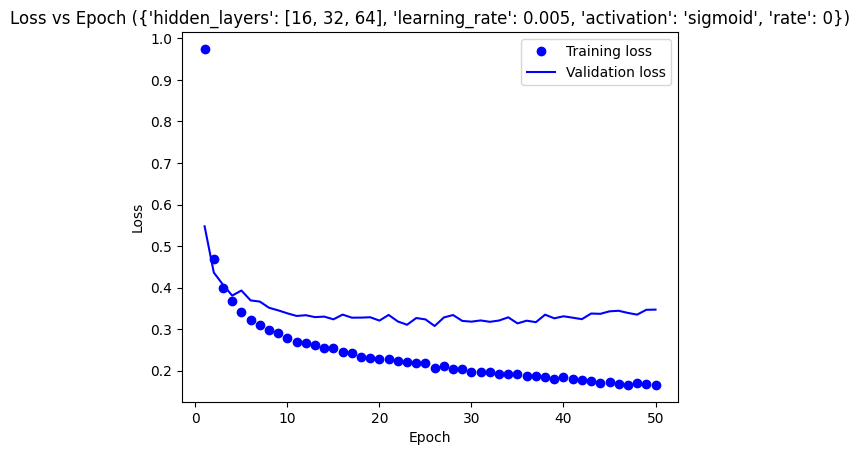

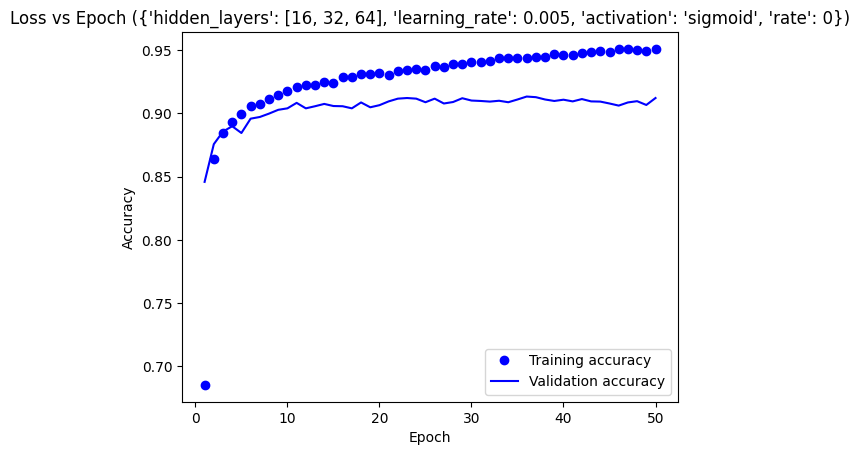

[0.9048333168029785, 82.61834287643433]

In [33]:
train_model([best_hyperparameters])

(1, 1024)
1/1 [==============================] - 0s 65ms/step
1


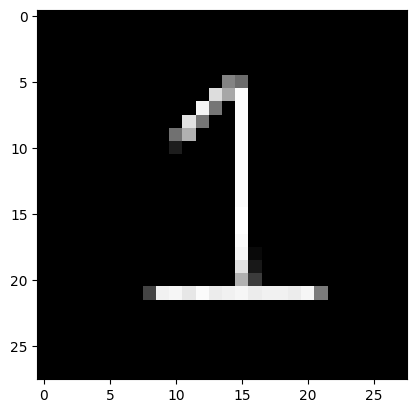

(1, 1024)
1/1 [==============================] - 0s 13ms/step
5


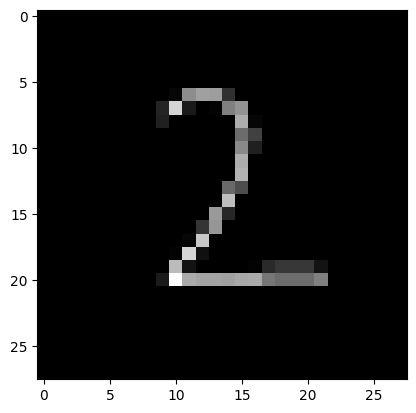

(1, 1024)
1/1 [==============================] - 0s 13ms/step
4


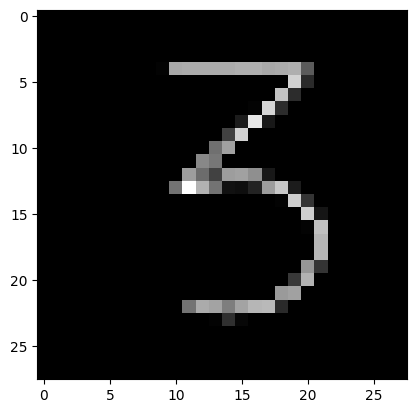

(1, 1024)
1/1 [==============================] - 0s 17ms/step
4


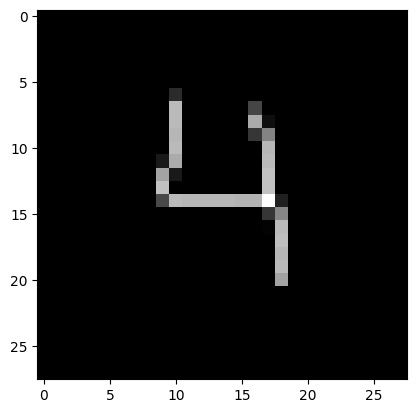

(1, 1024)
1/1 [==============================] - 0s 14ms/step
5


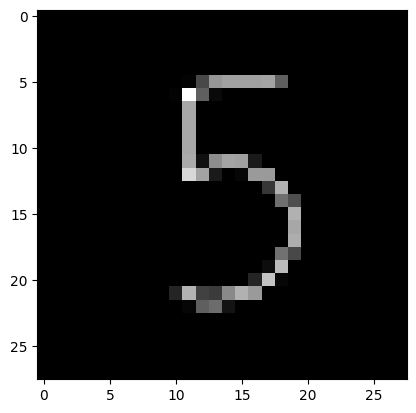

In [34]:
for i in range(1, 6):
    img = cv2.imread(str(i)+'.png')
    img = img[:, :, 2]
    img = cv2.resize(img, (28, 28), interpolation=cv2.INTER_AREA)
    img = 255-img
    imgplot = plt.imshow(img, cmap="gray")
    img = transform(img)
    img = np.expand_dims(img, axis=0)
    print(img.shape)
    pred = model.predict(img)
    print(np.argmax(pred))
    plt.show()